In [17]:
import numpy as np
import numpy.random as npr
from numpy.random import dirichlet, uniform
from utils import MH_beta, MH_Gaussian
from scipy.stats import beta, norm, bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Parameters

In [27]:
ns = [80, 100, 120]
n = 100
Ms = np.arange(10, 200, step=10)

### Binary data

In [28]:
# The conditional ESS 
def ESS1_beta(num, M, ns, ps, n):
    """
    Input:
        num: The number of times to generate weight parameter
        M: The amount parameters
        ns: The number of sample size for each historical dataset
        ps: The mean parameters for each historical dataset
        n: The sample size of the current dataset
    Return:
        The ESS averaging on the weighted
    
    """
    alps = np.array([nh/n for nh in ns])
    alps[alps>1] = 1
    Ds = [ bernoulli.rvs(ps[i], size=ns[i]) for i in range(len(ns))]
    phats = np.array([np.mean(Dh) for Dh in Ds])
    wss = dirichlet(alps, num)
    mus = np.sum(wss * phats, axis=1)
    invEta2s = M*np.sum(wss / (1-phats)/phats, axis=1)
    ESSs = mus*(1-mus)*invEta2s-1
    return np.mean(ESSs)

In [29]:
ps_range = [0.4, 0.6]
pss = uniform(ps_range[0], ps_range[1], size=(100, 3))

In [30]:
ESSss = []
for M in Ms:
    ESSs = []
    for ps in pss:
        ESS = ESS1_beta(num=10000, M=M, ns=ns, ps=ps, n=n)
        ESSs.append(ESS)
    ESSss.append(ESSs)

In [34]:
ESSsAv = np.mean(ESSss, axis=1)

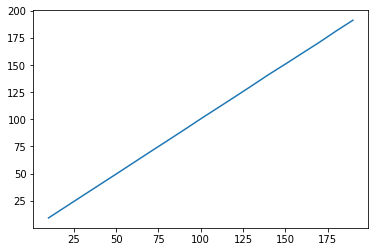

In [38]:
plt.plot(Ms, ESSsAv)